In [1]:
# from google.colab import files


# uploaded = files.upload()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')
# data_gender=pd.read_csv('gender_submission.csv')


Variables
Son 12 columnas en el dataset de entrenamiento.
PassengerId: Identificacion del pasajero desde 0 a 890
Survived: Indica si el pasajero sobrevivio
0 = No
1 = Si
Pclass: tickets de 1ra Clase,2da Clase,3ra Clase
Name: Nombre completo y titulo
Sex: genero de los pasajeros
Age: edad de los pasajeros
Sibsp: si los pasajeros tienen hermanos o conyuges
Parch: si los pasajeros tienen padres o hijos
Ticket: numero de ticket.
Fare: tarifa.
Cabin: numero de cabina.
Embarked: em donde se embarco el pasajero
C = Cherbourg
Q = Queenstown
S = Southampton

Primera visualizacion del dataset

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [6]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Se puede observar que las columnas Age y Cabin tienen una gran cantidad de nulos

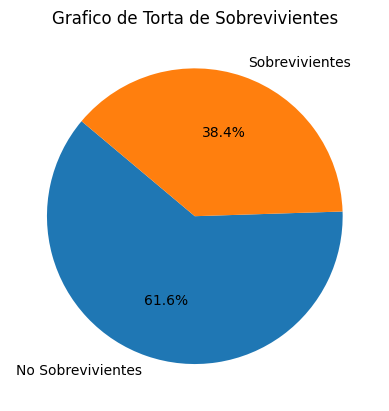

In [7]:
mapeo_categorias = {0:'No Sobrevivientes', 1:'Sobrevivientes'}


valores=data_train['Survived']
valores_nombres=valores.map(mapeo_categorias)

frecuencia_grupo=valores_nombres.value_counts()

plt.pie(frecuencia_grupo, labels=frecuencia_grupo.index, autopct='%1.1f%%', startangle=140)
plt.title('Grafico de Torta de Sobrevivientes')
plt.show()

Observamos que solo el 38% del total de pasajeros sobrevivio

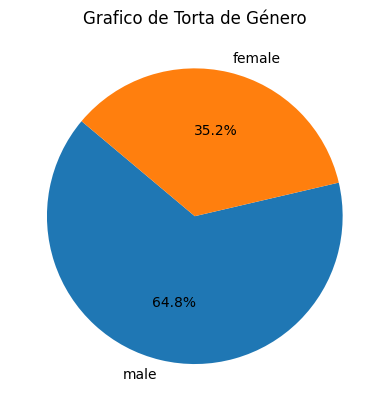

In [8]:
frecuencia_grupo=data_train['Sex'].value_counts()

plt.pie(frecuencia_grupo, labels=frecuencia_grupo.index, autopct='%1.1f%%', startangle=140)
plt.title('Grafico de Torta de Género')
plt.show()

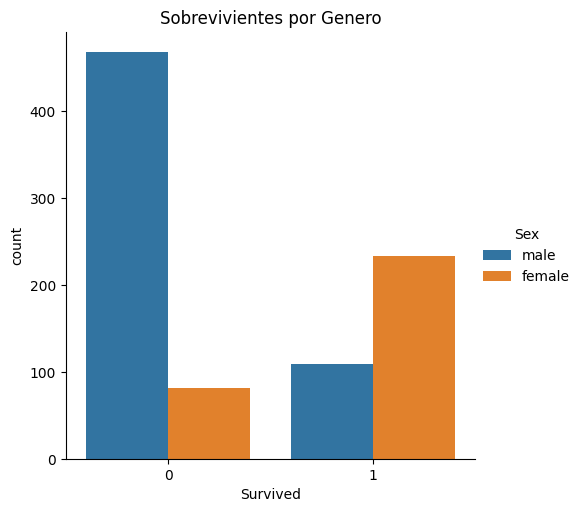

In [9]:
sns.catplot(x='Survived',data=data_train,kind='count',hue='Sex')
plt.title('Sobrevivientes por Genero')
plt.show()

0: No Sobrevivio,
1: Sobrevivio,
0: Mujer,
1: Hombre

Podemos observar que sobrevivio una cantidad mayor de mujeres que de hombres.

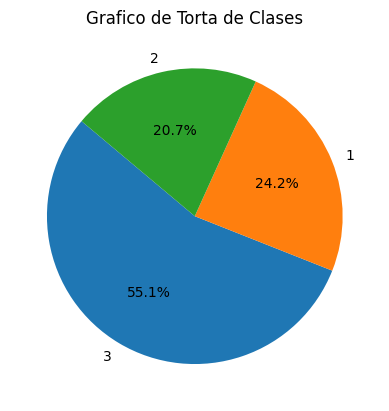

In [10]:
frecuencia_grupo=data_train['Pclass'].value_counts()

plt.pie(frecuencia_grupo, labels=frecuencia_grupo.index, autopct='%1.1f%%', startangle=140)
plt.title('Grafico de Torta de Clases')
plt.show()

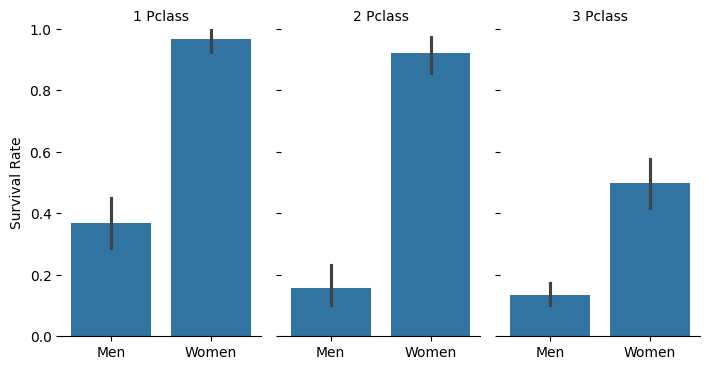

In [11]:
g = sns.catplot(
    data=data_train, x="Sex", y="Survived", col="Pclass",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

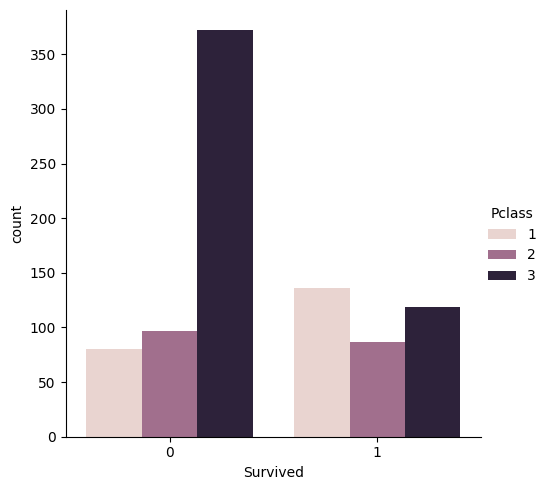

In [12]:
sns.catplot(x='Survived',data=data_train,kind='count',hue='Pclass')

Observamos que la mayor cantidad de perdidas es de la tercera clase, mientras que en primera y segunda la cantidad es pareja. De los que sobrevivieron vemos que las cantidades en las tres clases es aproximadamente uniforme.

Para rellenar los nulos de la columna age, extraemos el titulo de la columna name y asi obtener el Age de media para cada titulo y lo reemplazamos en los nulos correspondientes.

In [13]:
data_train['Title'] = data_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_medians = data_train.groupby('Title')['Age'].median()
print(title_medians)
def fill_age(row):
    if pd.isnull(row['Age']):
        return title_medians[row['Title']]
    else:
        return row['Age']

data_train['Age'] = data_train.apply(fill_age, axis=1)
print(data_train['Age'].isnull().sum())

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64
0


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Nico\AppData\Local\Temp\ipykernel_24280\3452269649.py:1: SyntaxWarning: invalid escape sequence '\.'
  data_train['Title'] = data_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Text(0.5, 1.0, 'Edad de Pasajeros')

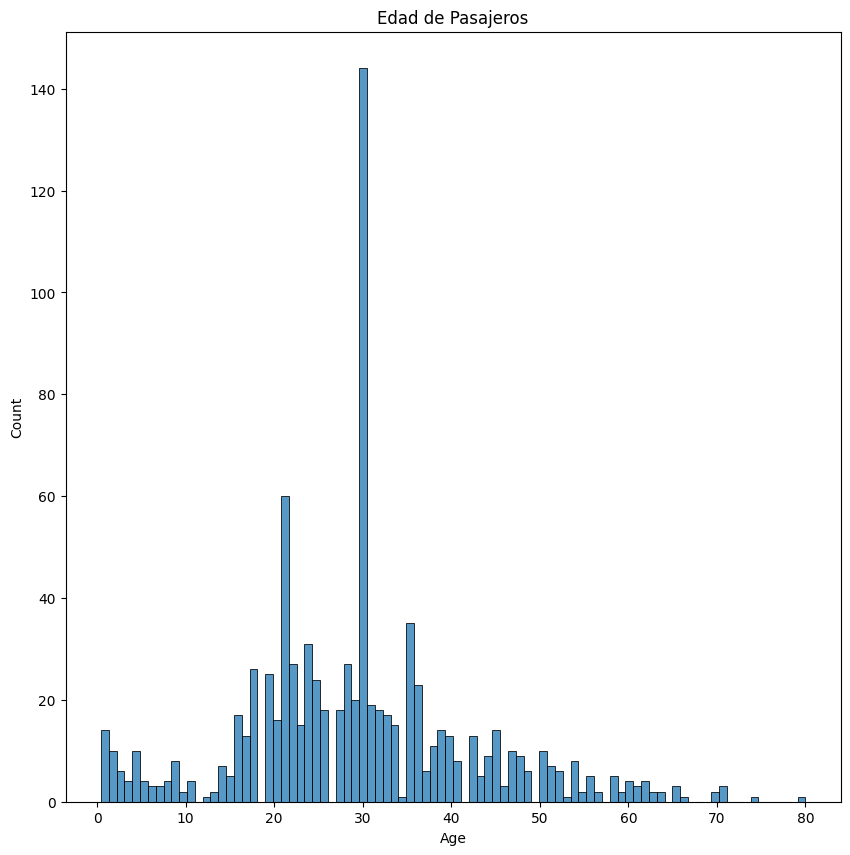

In [14]:
fig = plt.figure(figsize=(10,10))
sns.histplot(data_train['Age'], bins=90).set_title('Edad de Pasajeros')

Es visible los alores que tomamos como media para las filas nulas de a columna. Obviando eso podemos ver que la mayor cantidad de pasajeros se concentran entre los 17 años aproximadamente y los 45.

In [15]:
#Realizamos el reemplazo de los nulos tmbien en datatest
data_test['Title'] = data_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_medians = data_test.groupby('Title')['Age'].median()
print(title_medians)
def fill_age(row):
    if pd.isnull(row['Age']):
        return title_medians[row['Title']]
    else:
        return row['Age']

data_test['Age'] = data_test.apply(fill_age, axis=1)
print(data_test['Age'].isnull().sum())

Title
Col       50.0
Dona      39.0
Dr        53.0
Master     7.0
Miss      22.0
Mr        28.5
Mrs       36.5
Ms         NaN
Rev       35.5
Name: Age, dtype: float64
1


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Nico\AppData\Local\Temp\ipykernel_24280\3364212897.py:2: SyntaxWarning: invalid escape sequence '\.'
  data_test['Title'] = data_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Text(0.5, 1.0, 'Tarifa')

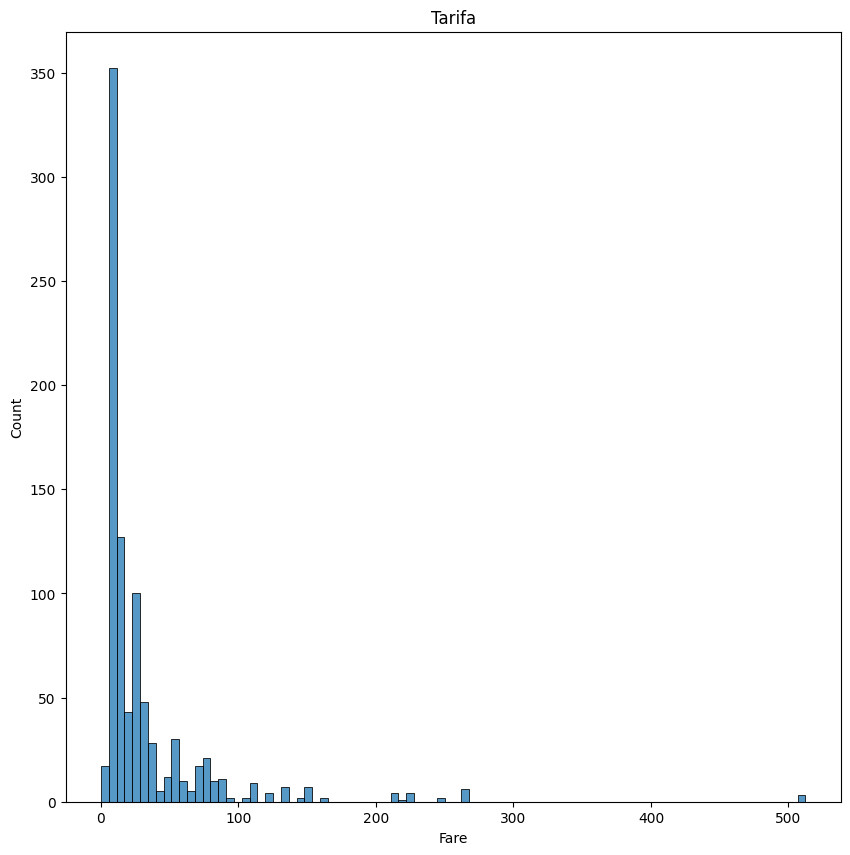

In [16]:
fig = plt.figure(figsize=(10,10))
sns.histplot(data_train['Fare'], bins=90).set_title('Tarifa')

In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


Tranformamos las columnas Sex y Embarked a columnas numericas

In [18]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder y transformar la columna 'Sex'
data_train['Sex'] = label_encoder.fit_transform(data_train['Sex'])
data_test['Sex'] = label_encoder.fit_transform(data_test['Sex'])

# Mostrar las primeras filas para verificar
print(data_train[['Sex']].head())

   Sex
0    1
1    0
2    0
3    0
4    1


In [19]:
# Ajustar el LabelEncoder y transformar la columna 'Embarked'
data_train['Embarked'] = label_encoder.fit_transform(data_train['Embarked'])
data_test['Embarked'] = label_encoder.fit_transform(data_test['Embarked'])
# Mostrar las primeras filas para verificar
print(data_train[['Embarked']].head())

   Embarked
0         2
1         0
2         2
3         2
4         2


Eliminamos las columnas que no aportaran valor al modelo de prediccion. Tambien eliminamos la columna Cabin ya que no tiene sufucientes datos para aportar informacion.

In [20]:
data_train = data_train.drop(columns=['Name', 'Ticket', 'Cabin','Title'])
data_test = data_test.drop(columns=['Name', 'Ticket', 'Cabin','Title'])
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


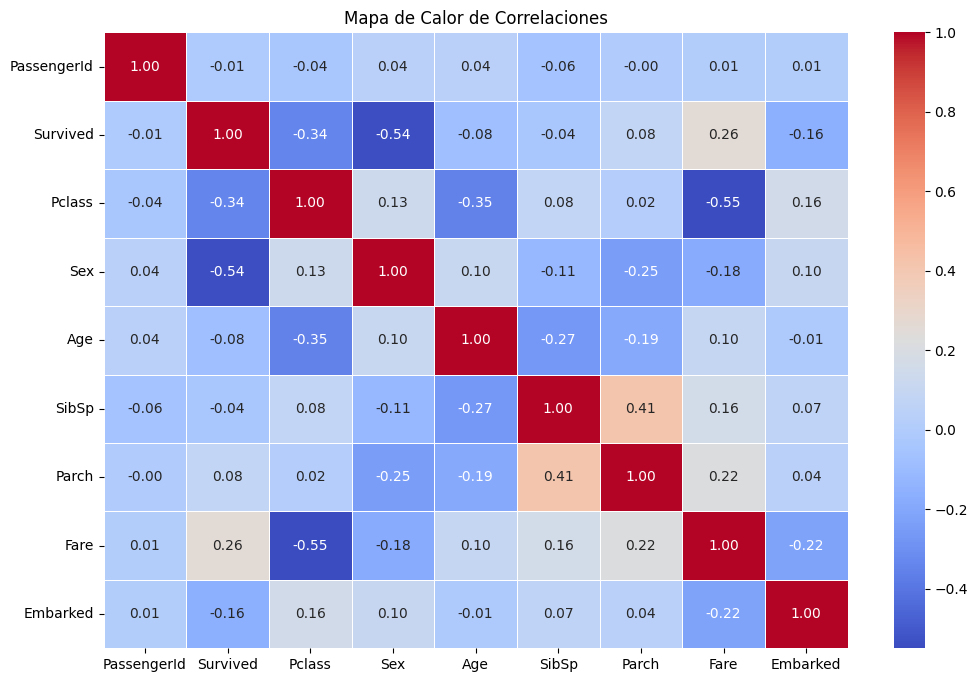

In [21]:
# Calcular la matriz de correlación
corr_matrix = data_train.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

Como podemos observar, exceptuando la columna fare. No hay una gran correlacion entre la columna survived y el resto. Hay una alta correlacion negativa con la columna Sex y Pclass

In [22]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [23]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          417 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


Elimino nulos del dataset de prueba

In [24]:
data_test = data_test.dropna(subset=['Age','Fare'])

In [25]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  416 non-null    int64  
 1   Pclass       416 non-null    int64  
 2   Sex          416 non-null    int32  
 3   Age          416 non-null    float64
 4   SibSp        416 non-null    int64  
 5   Parch        416 non-null    int64  
 6   Fare         416 non-null    float64
 7   Embarked     416 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 26.0 KB


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Preparo los conjuntos de entrenamiento y prueba

In [27]:
# Separar características y variable objetivo en el conjunto de entrenamiento
X_train = data_train.drop(columns=['Survived'])
y_train = data_train['Survived']

# Separar características y variable objetivo en el conjunto de prueba
X_test = data_test

Regresion Lineal

Para observar la situacion en la que se presenta el dataset utilizamos este modelo

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.model_selection import cross_val_score
# Realizar predicciones en conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el modelo utilizando validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Mostrar resultados de la validación cruzada
print(f"R^2 (cross-validation): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Mostrar las primeras predicciones (por ejemplo)
print(predictions[:5])


R^2 (cross-validation): 0.3713 ± 0.0421
[0.10098602 0.44906281 0.10515232 0.11525701 0.58857433]


Presenta un rscore bajo por lo que utilizaremos otros modelos para ver cual se adapta mejor

Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Inicializar y entrenar el modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions_random_forest = model.predict(X_test)

# Mostrar las primeras predicciones
print(predictions_random_forest[:5])

# Evaluar el modelo utilizando validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Mostrar resultados de la validación cruzada
print(f"Accuracy (cross-validation): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

[0 0 0 0 0]
Accuracy (cross-validation): 0.8015 ± 0.0512


In [31]:
from xgboost import XGBClassifier

# Inicializar y entrenar el modelo de XGBoost
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Mostrar las primeras predicciones
print(predictions[:5])

# Evaluar el modelo utilizando validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Mostrar resultados de la validación cruzada
print(f"Accuracy (cross-validation): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


[0 0 0 0 1]
Accuracy (cross-validation): 0.7903 ± 0.0648


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Mostrar las primeras predicciones
print(predictions[:5])

# Evaluar el modelo utilizando validación cruzada
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Mostrar resultados de la validación cruzada
print(f"Accuracy (cross-validation): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


[0 0 0 0 1]
Accuracy (cross-validation): 0.7890 ± 0.0160


In [33]:
from sklearn.tree import DecisionTreeClassifier

# Escalar las características (opcional para árboles de decisión)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Mostrar las primeras predicciones
print(predictions[:5])

# Evaluar el modelo utilizando validación cruzada
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Mostrar resultados de la validación cruzada
print(f"Accuracy (cross-validation): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


[0 0 0 0 0]
Accuracy (cross-validation): 0.7477 ± 0.0942


Vamos a utilizar el random forest ya que, si bien todos tienen una performance similar, es el que tiene el valor mas alto.

In [34]:
columnas_a_eliminar_dtrain = ['Survived','SibSp','Embarked']
columnas_a_eliminar_dtest = ['SibSp','Embarked']
#Eliminamos las columnas que disminuyan o no afecten positivamente a la performance del modelo


# Separar características y variable objetivo en el conjunto de entrenamiento
X_train = data_train.drop(columns=columnas_a_eliminar_dtrain)
y_train = data_train['Survived']


# Separar características y variable objetivo en el conjunto de prueba
X_test = data_test.drop(columns=columnas_a_eliminar_dtest)

In [35]:
# Inicializar y entrenar el modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions_random_forest = model.predict(X_test)

# Mostrar las primeras predicciones
print(predictions_random_forest[:5])

# Evaluar el modelo utilizando validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Mostrar resultados de la validación cruzada
print(f"Accuracy (cross-validation): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

[0 0 0 0 0]
Accuracy (cross-validation): 0.8082 ± 0.0584


Obtenemos un rscore de 0,8082

Guardamos los resultados

In [36]:
# Crear un DataFrame con PassengerId y las predicciones de Survived
submission = pd.DataFrame({
    'PassengerId': data_test['PassengerId'],
    'Survived': predictions_random_forest
})

# Asegurarse de que las predicciones sean enteros
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('gender_submission.csv', index=False)

Generamos la curva ROC

[0 0 0 0 0]
Accuracy (cross-validation): 0.8093 ± 0.0562
ROC AUC: 0.8972


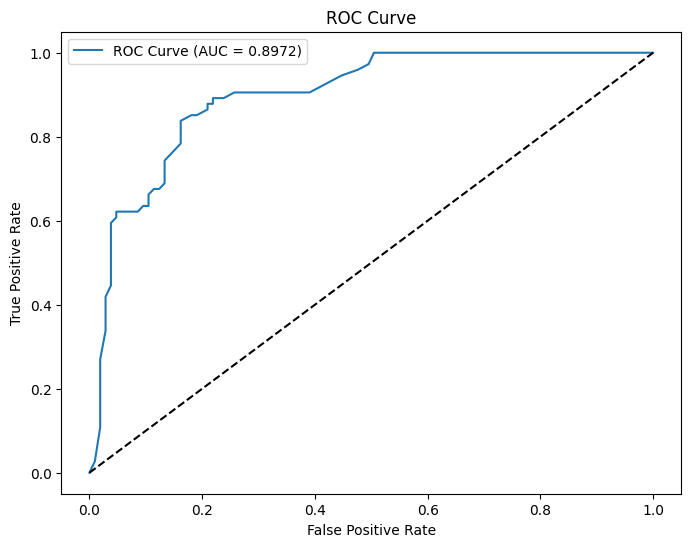

In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


# Escalar las características (opcional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y entrenar el modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Hacer predicciones probabilísticas en el conjunto de prueba
predictions_random_forest_proba = model.predict_proba(X_test_scaled)[:, 1]

# Hacer predicciones en el conjunto de prueba
predictions_random_forest = model.predict(X_test_scaled)

# Mostrar las primeras predicciones
print(predictions_random_forest[:5])

# Evaluar el modelo utilizando validación cruzada
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Accuracy (cross-validation): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Dividir los datos de entrenamiento para obtener un conjunto de validación
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento reducido
model.fit(X_train_split, y_train_split)

# Hacer predicciones probabilísticas en el conjunto de validación
y_val_pred_prob = model.predict_proba(X_val)[:, 1]

# Calcular la puntuación ROC AUC
roc_auc = roc_auc_score(y_val, y_val_pred_prob)
print(f'ROC AUC: {roc_auc:.4f}')

# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()



A partir de la visualizacion de la curva, que se aproxima a la esquina superior izquierda, y por el alto puntaje de ROC podemos indicar que el modelo tiene una muy buena capacidad para distinguir entre clases positivas y negativas. Como tmabien el modelo es capaz de identificar correctamente la mayoría de estas instancias.

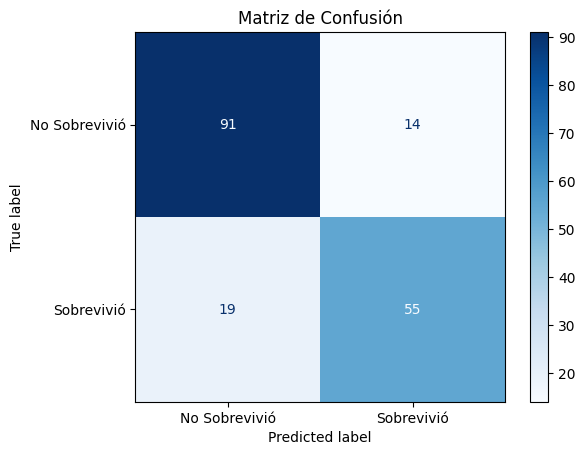

Accuracy: 0.8156


In [38]:

# Hacer predicciones binarias en el conjunto de validación
y_val_pred = model.predict(X_val)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Sobrevivió', 'Sobrevivió'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# Calcular métricas adicionales
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy: {accuracy:.4f}')

Podemos observar a partir de la matriz que el modelo tiene una gran capacidad para acertar quienes sobrevivieron y quienes no. Con una minima cantidad de falson positivos y negativos.